# Explorative Korpusanalyse des Datensatzes Nichtwissenschaft

## Vorbereitung

Daten einlesen

In [1]:
import pandas as pd
import nltk
import spacy
from collections import Counter
from spacy.tokens import Doc
from tqdm.notebook import tqdm

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
nlp = spacy.load('de_core_news_sm')

In [3]:
tweets_nichtwissenschaft = pd.read_excel('./data/tweets_nichtwissenschaft.xlsx')
accounts_nichtwissenschaft = pd.read_excel('./data/accounts_nichtwissenschaft.xlsx')

In [4]:
def update_astype_tweets(df):
    df['tweet_text'] = df['tweet_text'].astype(str)
    df['tweet_text'] = df['tweet_text'].replace('-998', '')
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].astype(str)
    df['retweet_text_retweeted_tweet'] = df['retweet_text_retweeted_tweet'].replace('-998', '')
    df['zitat_text'] = df['zitat_text'].astype(str)
    df['zitat_text'] = df['zitat_text'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

def update_astype_bios(df):
    df['tweet_creator_bio'] = df['tweet_creator_bio'].astype(str)
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('-998', '')
    df['tweet_creator_bio'] = df['tweet_creator_bio'].replace('nan', '')

In [5]:
update_astype_tweets(tweets_nichtwissenschaft)
update_astype_bios(accounts_nichtwissenschaft)

Laden der Spacy Docs

In [6]:
def load_spacy_docs_tweets(df, name):
    tweet_doc = []
    retweet_doc = []
    zitat_doc = []
    for index, row in df.iterrows():
        filename_tweet = "tweet_" + str(index).replace(" ", "") + ".txt"
        tweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/tweets/{filename_tweet}"))

        filename_retweet = "retweet_" + str(index).replace(" ", "") + ".txt"
        retweet_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/retweets/{filename_retweet}"))

        filename_zitat = "zitat_" + str(index).replace(" ", "") + ".txt"
        zitat_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/zitat_tweets/{filename_zitat}"))
  
    # add the list of spacy docs as a new column to the dataframe
    df[f"spacy_doc_tweets"] = tweet_doc
    df[f"spacy_doc_retweets"] = retweet_doc
    df[f"spacy_doc_zitat_tweets"] = zitat_doc

In [7]:
def load_spacy_docs_bios(df, name):
    spacy_doc = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        filename_bio = "bio_" + str(index).replace(" ", "") + ".txt"
        spacy_doc.append(Doc(nlp.vocab).from_disk(f"./spacy_docs/{name}/{filename_bio}"))
    df[f"spacy_doc_bios"] = spacy_doc

In [8]:
load_spacy_docs_tweets(tweets_nichtwissenschaft, 'tweets_nichtwissenschaft')
load_spacy_docs_bios(accounts_nichtwissenschaft, 'bios_nichtwissenschaft')

  0%|          | 0/9119 [00:00<?, ?it/s]

In [9]:
tweets_nichtwissenschaft.head()

tweet_date_create tweet_creator_atName        tweet_creator_screenName  \
0 2022-12-14 20:19:48       SuchtiSchleich                          Steffk   
1 2022-12-14 20:20:26             printi71  printi007 aka Dr. Canceloretta   
2 2022-12-14 20:20:34            4linblue1                       4linblue🔱   
3 2022-12-14 20:21:01       HartwigKmmerle                      Ho finito!   
4 2022-12-14 20:21:11             printi71  printi007 aka Dr. Canceloretta   

                                   tweet_creator_bio  \
0                                                      
1                            😷 Infektionsverweigerin   
2  Wenn ein Kopf und ein Buch zusammen stoßen und...   
3  + jedem Anfang wohnt ein Zauber inne, der uns ...   
4                            😷 Infektionsverweigerin   

                                          tweet_text  \
0                                                      
1                                                      
2  @MartinZenker @JochenBittner Hier in der Famil...   
3                                                      
4                                                      

                        retweet_text_retweeted_tweet  \
0  Es scheint so weit weg, so surreal, aber es fe...   
1  @mecfsbuch @nervensystemck #KleinschnitzRaussc...   
2                                                      
3  Forschung an einem faszinierenden Potenzialthe...   
4          #KleinschnitzRausschmiss sollte trenden!    

                                          zitat_text    gender institution  \
0                                                     männlich      Person   
1  #KleinschnitzRausschmiss bitte jetzt @Uniklini...  weiblich      Person   
2                                                       unklar      unklar   
3                                                     männlich      Person   
4  #KleinschnitzRausschmiss bitte jetzt @Uniklini...  weiblich      Person   

  author_category                                   spacy_doc_tweets  \
0          unklar                                                 ()   
1          unklar                                                 ()   
2          unklar  (@MartinZenker, @JochenBittner, Hier, in, der,...   
3          unklar                                                 ()   
4          unklar                                                 ()   

                                  spacy_doc_retweets  \
0  (Es, scheint, so, weit, weg, ,, so, surreal, ,...   
1  (@mecfsbuch, @nervensystemck, #, KleinschnitzR...   
2                                                 ()   
3  (Forschung, an, einem, faszinierenden, Potenzi...   
4   (#, KleinschnitzRausschmiss, sollte, trenden, !)   

                              spacy_doc_zitat_tweets  
0                                                 ()  
1  (#, KleinschnitzRausschmiss, bitte, jetzt, @Un...  
2                                                 ()  
3                                                 ()  
4  (#, KleinschnitzRausschmiss, bitte, jetzt, @Un...

In [10]:
accounts_nichtwissenschaft.head()

tweet_creator_atName       tweet_creator_screenName  \
0        GreenFire_93D               GreenFire_Dancer   
1            Mag2012Ge  maggie🇪🇺 #StandWithUkraine 🇺🇦   
2        MailanderUlla                 Ulla Mailänder   
3           HannesKopf                    Hannes Kopf   
4          flatterweib                         Gaby 🤠   

                                   tweet_creator_bio    gender institution  \
0                                                       unklar      unklar   
1  #blacklivesmatter #humanrights #animalrights #...  weiblich      Person   
2  Mutter eines erwachsenen Sohnes mit ME/CFS und...  weiblich      Person   
3                                                     männlich      Person   
4                            ach guck, sie auch hier  weiblich      Person   

  author_category                                     spacy_doc_bios  
0          unklar                                                 ()  
1          unklar  (#, blacklivesmatter, #, humanrights, #, anima...  
2          unklar  (Mutter, eines, erwachsenen, Sohnes, mit, ME, ...  
3          unklar                                                 ()  
4          unklar                    (ach, guck, ,, sie, auch, hier)

## Statistiken

### Verhältnis Tweets - Retweets - Zitierte Tweets

In [11]:
def count_tweet_type(df):
    count_tweets = (df['spacy_doc_tweets'].apply(lambda doc: len(doc) > 0)).sum() 
                     
    count_retweets = (df['spacy_doc_retweets'].apply(lambda doc: len(doc) > 0)).sum()

    count_zitat =  (df['spacy_doc_zitat_tweets'].apply(lambda doc: len(doc) > 0)).sum()
    
    # Gesamtanzahl der Zeilen im DataFrame
    total_rows = len(df)

    # Berechnung der relativen Häufigkeiten
    relative_tweets = count_tweets / total_rows
    relative_retweets = count_retweets / total_rows
    relative_zitat = count_zitat / total_rows

    print(f"Anzahl Tweets: {count_tweets} ({relative_tweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl Retweets: {count_retweets} ({relative_retweets:.2%} der Gesamtanzahl)")
    print(f"Anzahl zitierte Tweets: {count_zitat} ({relative_zitat:.2%} der Gesamtanzahl)")

In [12]:
count_tweet_type(tweets_nichtwissenschaft)

Anzahl Tweets: 8682 (39.53% der Gesamtanzahl)
Anzahl Retweets: 13283 (60.47% der Gesamtanzahl)
Anzahl zitierte Tweets: 4480 (20.40% der Gesamtanzahl)


### Verteilung der Accounts

In [13]:
accounts_nichtwissenschaft.shape

(9119, 7)

In [14]:
institution_counts = accounts_nichtwissenschaft['institution'].value_counts()
institution_percentages = (institution_counts / institution_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Accounts nach Institution:")
print(institution_counts)
print("\nProzentsatz der Accounts nach Institution:")
print(institution_percentages)

Anzahl der Accounts nach Institution:
institution
Person               6429
unklar               2605
Nachrichtendienst      85
Name: count, dtype: int64

Prozentsatz der Accounts nach Institution:
institution
Person               70.501151
unklar               28.566729
Nachrichtendienst     0.932120
Name: count, dtype: float64


In [15]:
category_counts = accounts_nichtwissenschaft['author_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Accounts nach Kategorie:")
print(category_counts)
print("\nProzentsatz der Accounts nach Kategorie:")
print(category_percentages)

Anzahl der Accounts nach Kategorie:
author_category
unklar          9011
Politiker*in     108
Name: count, dtype: int64

Prozentsatz der Accounts nach Kategorie:
author_category
unklar          98.81566
Politiker*in     1.18434
Name: count, dtype: float64


In [16]:
gender_counts = accounts_nichtwissenschaft[accounts_nichtwissenschaft['institution'] == 'Person']['gender'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum()) * 100

print("Anzahl der Accounts nach Gender:")
print(gender_counts)
print("\nProzentsatz der Accounts nach Gender:")
print(gender_percentages)

Anzahl der Accounts nach Gender:
gender
männlich     3605
weiblich     1901
unklar        836
non-binär      87
Name: count, dtype: int64

Prozentsatz der Accounts nach Gender:
gender
männlich     56.074040
weiblich     29.569140
unklar       13.003578
non-binär     1.353243
Name: count, dtype: float64


### Verteilung der Tweets

In [17]:
tweets_nichtwissenschaft.shape

(21965, 13)

In [18]:
institution_counts = tweets_nichtwissenschaft['institution'].value_counts()
institution_percentages = (institution_counts / institution_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Tweets nach Institution:")
print(institution_counts)
print("\nProzentsatz der Tweets nach Institution:")
print(institution_percentages)

Anzahl der Tweets nach Institution:
institution
Person               15458
unklar                6182
Nachrichtendienst      325
Name: count, dtype: int64

Prozentsatz der Tweets nach Institution:
institution
Person               70.375598
unklar               28.144776
Nachrichtendienst     1.479627
Name: count, dtype: float64


In [19]:
category_counts = tweets_nichtwissenschaft['author_category'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100

# Gib die Anzahl und die Prozentwerte aus
print("Anzahl der Tweets nach Kategorie:")
print(category_counts)
print("\nProzentsatz der Tweets nach Kategorie:")
print(category_percentages)

Anzahl der Tweets nach Kategorie:
author_category
unklar          21780
Politiker*in      185
Name: count, dtype: int64

Prozentsatz der Tweets nach Kategorie:
author_category
unklar          99.157751
Politiker*in     0.842249
Name: count, dtype: float64


In [20]:
gender_counts = tweets_nichtwissenschaft[tweets_nichtwissenschaft['institution'] == 'Person']['gender'].value_counts()
gender_percentages = (gender_counts / gender_counts.sum()) * 100

print("Anzahl der Tweets nach Gender:")
print(gender_counts)
print("\nProzentsatz der Tweets nach Gender:")
print(gender_percentages)

Anzahl der Tweets nach Gender:
gender
männlich     7887
weiblich     5351
unklar       2042
non-binär     178
Name: count, dtype: int64

Prozentsatz der Tweets nach Gender:
gender
männlich     51.022124
weiblich     34.616380
unklar       13.209988
non-binär     1.151507
Name: count, dtype: float64


### Token + Sentences

In [21]:
def get_token_sent_counts(df):
    result = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        token_counter = 0
        sentence_counter = 0
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            spacy_doc = row[f"spacy_doc_{name}"]
            # Überprüfe, ob das Spacy-Dokument nicht leer ist
            if len(spacy_doc) > 0:
                for sent in spacy_doc.sents:
                    sentence_counter += 1
                    for token in sent:
                        # Überprüfen Sie die Token-Eigenschaften für die Filterung
                        if not (token.is_punct or
                                token.is_space or
                                token.is_digit or
                                token.is_quote or
                                token.like_url or
                                token.like_email):
                            token_counter += 1
        result[name] = (token_counter, sentence_counter)
    return result


In [22]:
counts = get_token_sent_counts(tweets_nichtwissenschaft)

  0%|          | 0/21965 [00:00<?, ?it/s]

  0%|          | 0/21965 [00:00<?, ?it/s]

  0%|          | 0/21965 [00:00<?, ?it/s]

In [23]:
data = {'Category': ['Tokens', 'Sentences'],
        'Tweets': [counts['tweets'][0], counts['tweets'][1]],
        'Retweets': [counts['retweets'][0], counts['retweets'][1]],
        'Zitierte Tweets': [counts['zitat_tweets'][0], counts['zitat_tweets'][1]],
       }

tok_sent = pd.DataFrame(data)
tok_sent

Category  Tweets  Retweets  Zitierte Tweets
0     Tokens  227981    405286           140661
1  Sentences   28632     48048            16187

In [24]:
def stats(counts, column, df):
    valid_rows = sum(1 for index, row in df.iterrows() if len(row[f"spacy_doc_{column}"]) > 0)
    mean_tok = counts[column][0] / valid_rows
    mean_sent = counts[column][1] / valid_rows
    tok_per_sent = counts[column][0] / counts[column][1]
    return [mean_tok, mean_sent, tok_per_sent]

In [25]:
data = {'Category': ['Mean Tokens per Tweet', 'Mean Sentences per Tweet', 'Tokens per Sentence'],
        'Tweets': stats(counts, 'tweets', tweets_nichtwissenschaft) ,
        'Retweets': stats(counts, 'retweets', tweets_nichtwissenschaft) ,
        'Zitierte Tweets': stats(counts, 'zitat_tweets', tweets_nichtwissenschaft) ,
       }
tok_sent_stats = pd.DataFrame(data)
tok_sent_stats

Category     Tweets   Retweets  Zitierte Tweets
0     Mean Tokens per Tweet  26.259042  30.511631        31.397545
1  Mean Sentences per Tweet   3.297858   3.617255         3.613170
2       Tokens per Sentence   7.962455   8.435023         8.689751

#### Type-Token Verhältnis

Lemmas extrahieren

In [26]:
def get_lemmas(df):
    lemmas = {}
    for name in ["tweets", "retweets", "zitat_tweets"]:
        lemmas[name] = []  # Initialisieren Sie die Liste für den Schlüssel 'name'
        for index, row in tqdm(df.iterrows(), total=df.shape[0]):
            for token in row[f"spacy_doc_{name}"]:
                if not token.is_punct and \
                    not token.is_space and \
                    not token.is_bracket and \
                    not token.is_digit and \
                    not token.is_quote and \
                    not token.like_url and \
                    not token.like_email:
                    lemmas[name].append(token.lemma_)
    return lemmas

In [27]:
lemmas_tweets = get_lemmas(tweets_nichtwissenschaft)

  0%|          | 0/21965 [00:00<?, ?it/s]

  0%|          | 0/21965 [00:00<?, ?it/s]

  0%|          | 0/21965 [00:00<?, ?it/s]

Type-Token-Ratio berechnen

In [28]:
from lexical_diversity import lex_div as ld

In [29]:
data = {'Category': ['Type Token Ratio'],
        'Tweets': ld.ttr(lemmas_tweets["tweets"]),
        'Retweets': ld.ttr(lemmas_tweets["retweets"]),
        'Zitierte Tweets': ld.ttr(lemmas_tweets["zitat_tweets"]),
       }
ttr = pd.DataFrame(data)
ttr

Category    Tweets  Retweets  Zitierte Tweets
0  Type Token Ratio  0.145849  0.048715         0.079882

#### Token per Bio

In [30]:
def calculate_token_stats(docs):
    num_tokens = [len(doc) for doc in docs]

    min_tokens = min(num_tokens)
    max_tokens = max(num_tokens)
    avg_tokens = sum(num_tokens) / len(num_tokens)

    return min_tokens, max_tokens, avg_tokens

min_tokens, max_tokens, avg_tokens = calculate_token_stats(accounts_nichtwissenschaft['spacy_doc_bios'])

print("Minimal tokens in bio:", min_tokens)
print("Maximal tokens in bio:", max_tokens)
print("Durchschnittliche tokens in bio:", avg_tokens)

Minimal tokens in bio: 0
Maximal tokens in bio: 61
Durchschnittliche tokens in bio: 13.2272178966992


## Häufigste Wörter

### Tweets

#### WordCloud Funktion

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [32]:
def create_wordcloud(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=1500, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [33]:
def create_wordcloud_vertical(df):
    # Dict erstellen
    word_dict = dict(zip(df['word'], df['freq']))
    
    # WordCloud erstellen
    wordcloud = WordCloud(width=700, height=800, background_color='white').generate_from_frequencies(word_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

#### Die häufigsten Wörter 1 - ohne Stoppwörter

In [34]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter
import string

In [35]:
def filter_tokens(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop 
            and not token.is_punct and not token.like_num]

In [36]:
def common_words1(df, name):
    words = []
    for doc in df[f"spacy_doc_{name}"]:
        if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
            words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(50)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [37]:
def common_words_all1(df):
    words = []
    names = ["tweets", "retweets", "zitat_tweets"]
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            if len(doc) > 0:  # Überprüfen, ob das Dokument nicht leer ist
                words.extend(filter_tokens(doc))

    word_freq = Counter(words)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [38]:
common_words_tweets = common_words1(tweets_nichtwissenschaft, 'tweets')
common_words_retweets = common_words1(tweets_nichtwissenschaft, 'retweets')
common_words_zitat_tweets = common_words1(tweets_nichtwissenschaft, 'zitat_tweets')
common_words_all = common_words_all1(tweets_nichtwissenschaft)

In [39]:
common_words_tweets

word  freq
0          forschung  6381
1       wissenschaft   536
2                mal   438
3                      415
4             mensch   380
5               geld   371
6             wissen   365
7           brauchen   353
8            bildung   348
9   @karl_lauterbach   310
10       entwicklung   307
11             mecfs   289
12       deutschland   287
13           aktuell   274
14           einfach   260
15                 ️   253
16            finden   248
17            studie   246
18         longcovid   243
19             thema   241
20             sehen   233
21           wichtig   231
22             lehre   212
23                --   211
24                 d   209
25               neu   206
26  wissenschaftlich   203
27           problem   183
28       investieren   177
29          ergebnis   175
30             leben   174
31             frage   166
32                 u   165
33             bitte   164
34             genau   163
35              frau   153
36           bereich   151
37             geben   149
38                 +   148
39            denken   148
40       betroffener   147
41        innovation   145
42            helfen   144
43           bringen   143
44            zeigen   143
45   @starkwatzinger   142
46             covid   141
47           politik   140
48         betreiben   139
49           million   136

In [40]:
common_words_retweets

word  freq
0          forschung  9181
1              mecfs  1839
2             pfizer  1685
3          longcovid  1392
4           brauchen  1183
5             mensch  1022
6         versorgung  1004
7        betroffener   989
8   mecfsimbundestag   941
9      gof-forschung   845
10       deutschland   786
11            zeigen   778
12            finden   778
13               weg   695
14                 ️   684
15               mal   676
16            medium   619
17               dr.   614
18      wissenschaft   593
19             china   571
20  @karl_lauterbach   563
21          spannend   552
22        enthüllung   541
23             legen   533
24            studie   529
25       anerkennung   520
26              voll   508
27           wichtig   498
28          programm   488
29            robert   474
30       übersetzung   471
31         bundestag   468
32          löschung   464
33     eingeständnis   464
34          resonanz   464
35     sonntagskrimi   463
36      mrna-pionier   463
37            malone   463
38               bot   463
39         derailing   463
40           holprig   463
41           fordern   430
42         verstehen   426
43            wieler   418
44                of   415
45             hilfe   412
46        aufklärung   410
47                 🇪   403
48             lehre   401
49   @starkwatzinger   396

In [41]:
common_words_zitat_tweets

word  freq
0          forschung  2783
1                  ️   659
2      demonstrieren   646
3                 --   609
4              lehre   520
5           brauchen   517
6                  ➡   512
7        information   510
8             wieler   501
9             lothar   496
10           aufgabe   490
11                h.   475
12            widmen   475
13               amt   474
14         gemeinsam   468
15             april   460
16               rki   457
17         verlässen   455
18       niederlegen   453
19       dankewieler   452
20         professor   449
21         @bmg_bund   449
22  pressemitteilung   444
23         longcovid   400
24             china   371
25             liebe   361
26             mecfs   343
27             klima   343
28          dringend   336
29               uni   332
30             falls   328
31              euer   322
32         engagiert   318
33     klimaschützer   317
34          ansinnen   317
35              ehre   317
36          fleissig   317
37             demos   317
38               the   258
39             covid   251
40                to   248
41            zeigen   236
42            pfizer   228
43                of   214
44      wissenschaft   208
45        versorgung   202
46        innovation   192
47            mensch   187
48            studie   183
49       entwicklung   171

In [42]:
common_words_all

word   freq
0    forschung  18345
1        mecfs   2471
2     brauchen   2053
3       pfizer   2043
4    longcovid   2035
..         ...    ...
95   betreiben    479
96     politik    474
97         cfs    472
98  behandlung    472
99  kernfusion    470

[100 rows x 2 columns]

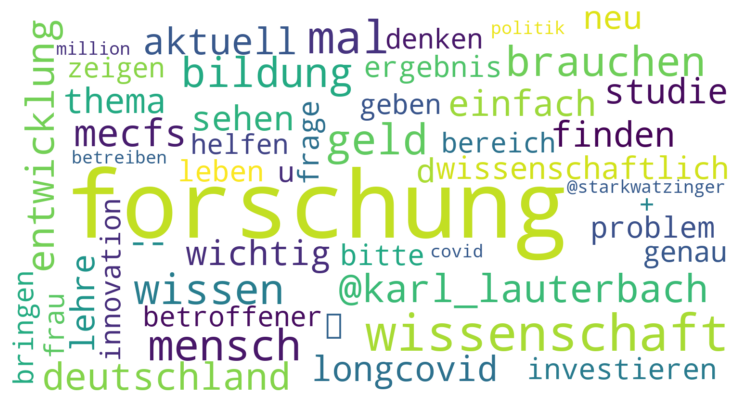

In [43]:
create_wordcloud(common_words_tweets)

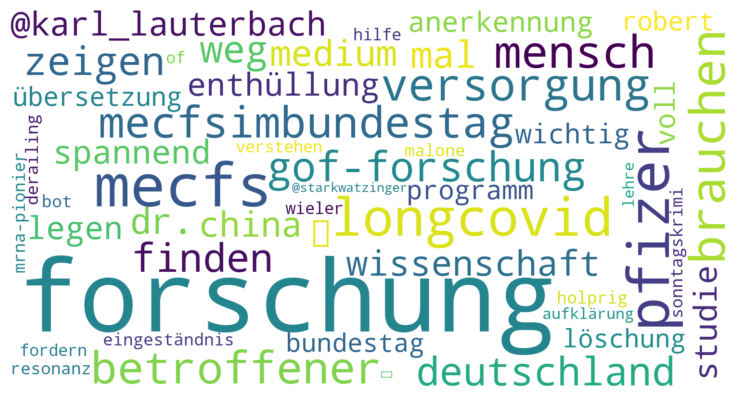

In [44]:
create_wordcloud(common_words_retweets)

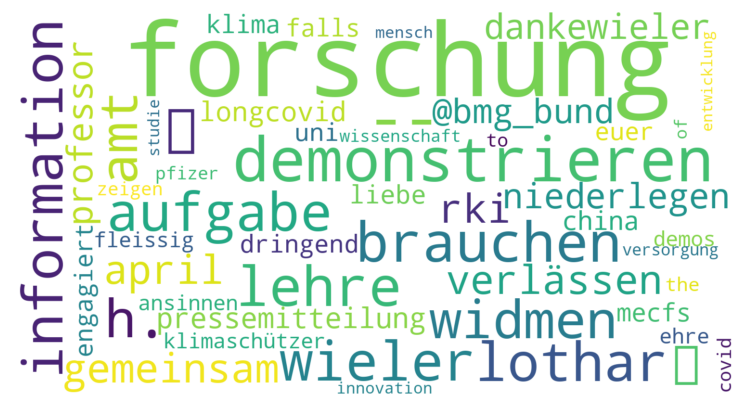

In [45]:
create_wordcloud(common_words_zitat_tweets)

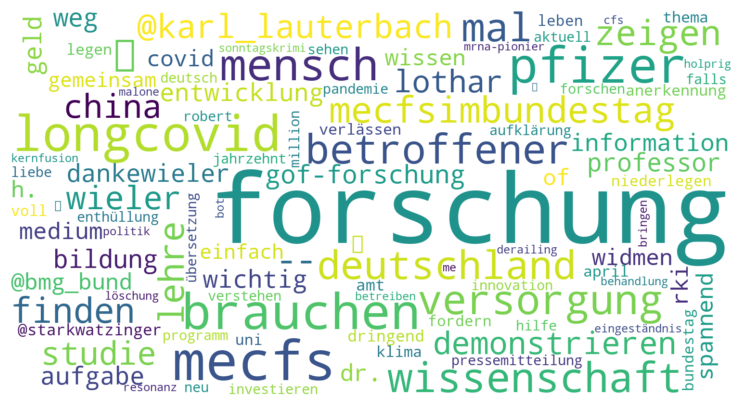

In [46]:
create_wordcloud(common_words_all)

#### Die häufigsten Wörter 2 - ohne Stoppwörter und Hashtags

In [47]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/annalenahiergeist/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
def common_words2(tweets):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()

    # Iteration über jeden Tweet
    for tweet in tweets:
        # Entfernen von Hashtags
        words = tweet.split()
        words = [word for word in words if not word.startswith('#')]

        # Wieder zusammenfügen zu einem String und Tokenisierung
        tweet = ' '.join(words)
        tokens = word_tokenize(tweet, language='german')

        # Filtern der Stoppwörter und Zählen
        words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
        word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [49]:
def common_words_all2(df):
    spacy_stopwords = nlp.Defaults.stop_words
    word_freq = Counter()
    words = []
    names = ["tweet_text", "retweet_text_retweeted_tweet", "zitat_text"]
    for name in names:
           for tweet in df[name]:
               # Entfernen von Hashtags
                words = tweet.split()
                words = [word for word in words if not word.startswith('#')]
               
                # Wieder zusammenfügen zu einem String und Tokenisierung
                tweet = ' '.join(words)
                tokens = word_tokenize(tweet, language='german')

                # Filtern der Stoppwörter und Zählen
                words = [word.lower() for word in tokens if word.isalpha() and word not in spacy_stopwords]
                word_freq.update(words)
    
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [50]:
common_words_tweets2 = common_words2(tweets_nichtwissenschaft['tweet_text'])
common_words_retweets2 = common_words2(tweets_nichtwissenschaft['retweet_text_retweeted_tweet'])
common_words_zitat_tweets2 = common_words2(tweets_nichtwissenschaft['zitat_text'])
common_words_all2 = common_words_all2(tweets_nichtwissenschaft)

In [51]:
common_words_tweets2.head(50)

word  freq
0        forschung  5896
1              die  1052
2              das   864
3              sie   786
4              ich   601
5               es   553
6              und   516
7              mal   434
8              wir   424
9     wissenschaft   381
10        menschen   349
11             der   332
12            geld   311
13          jahren   304
14            aber   296
15             was   275
16     entwicklung   268
17         bildung   254
18              in   253
19     deutschland   244
20         einfach   243
21             wie   243
22            wenn   240
23               d   218
24            welt   204
25           lehre   202
26           thema   198
27           jahre   197
28        brauchen   190
29          wissen   182
30              da   175
31            zeit   168
32             ein   168
33           bitte   165
34               u   163
35              ja   154
36             mit   154
37           genau   151
38  starkwatzinger   149
39           leben   149
40         braucht   146
41            eine   145
42           stand   139
43           innen   138
44           covid   135
45             wer   134
46           frage   131
47       millionen   129
48      versorgung   127
49           danke   125

In [52]:
common_words_retweets2.head(50)

word  freq
0        forschung  8391
1              die  2424
2              sie  1728
3              wir  1366
4               es  1280
5              das  1025
6         menschen   988
7              ich   961
8       versorgung   876
9          pfizers   840
10          pfizer   752
11           zeigt   708
12     deutschland   697
13             mal   673
14             weg   657
15          jahren   647
16        brauchen   644
17              in   619
18          medien   617
19      betroffene   605
20           china   578
21    enthüllungen   522
22             der   512
23            fand   512
24           legen   502
25           volle   491
26        programm   477
27     übersetzung   471
28      spannender   469
29          robert   468
30   eingeständnis   464
31        resonanz   464
32   sonntagskrimi   463
33          malone   463
34      löschungen   463
35            bots   463
36       derailing   463
37        holprige   463
38    wissenschaft   456
39     anerkennung   442
40              of   433
41  starkwatzinger   425
42             und   425
43            also   425
44             wie   414
45            auch   410
46      aufklärung   407
47             was   403
48           heute   403
49             ein   392

In [53]:
common_words_zitat_tweets2.head(50)

word  freq
0          forschung  2612
1                die   527
2              lehre   514
3      informationen   497
4             lothar   496
5                 er   495
6             wieler   491
7             widmen   474
8                amt   472
9               alle   470
10          aufgaben   463
11             april   460
12          verlässt   455
13       niederlegen   453
14               wir   452
15               rki   448
16         professor   446
17  pressemitteilung   444
18       gemeinsamen   442
19               the   412
20               das   394
21             china   366
22               ihr   356
23             liebe   348
24             klima   337
25          dringend   335
26              also   329
27               uni   329
28                da   328
29             falls   328
30     demonstrieren   328
31         engagiert   321
32         gebraucht   319
33     klimaschützer   317
34              euer   317
35          ansinnen   317
36             ehren   317
37          fleissig   317
38      demonstriert   317
39             demos   317
40               ich   316
41                of   311
42                es   298
43               sie   266
44                to   248
45                is   217
46             zeigt   214
47             covid   210
48                in   199
49               der   194

In [54]:
common_words_all2.head(50)

word   freq
0        forschung  16899
1              die   4003
2              sie   2780
3              das   2283
4              wir   2242
5               es   2131
6              ich   1878
7         menschen   1513
8              mal   1218
9       versorgung   1192
10           lehre   1081
11     deutschland   1072
12              in   1071
13             der   1038
14          jahren   1029
15             und   1017
16           zeigt   1012
17    wissenschaft   1003
18           china   1002
19        brauchen    982
20          pfizer    982
21          lothar    905
22         pfizers    895
23          wieler    894
24              of    867
25            also    841
26             weg    818
27              er    808
28             was    771
29      betroffene    757
30   informationen    757
31     entwicklung    753
32            alle    753
33        aufgaben    750
34             wie    749
35          medien    725
36  starkwatzinger    718
37          widmen    705
38            wenn    695
39           jahre    674
40              da    674
41         bildung    674
42             amt    664
43        dringend    658
44         einfach    654
45            geld    653
46             ein    648
47             rki    646
48           april    646
49        verlässt    643

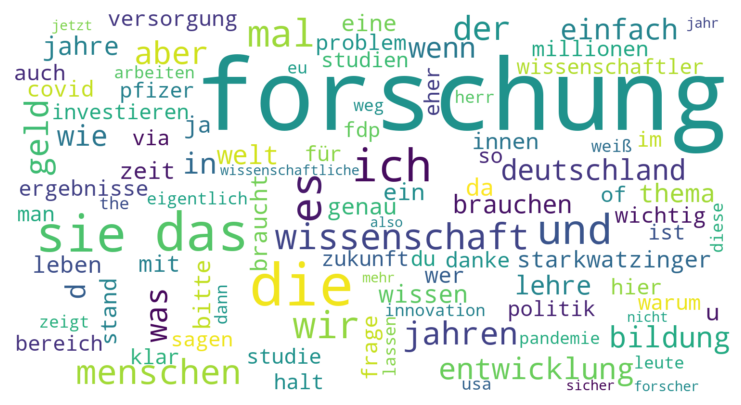

In [55]:
create_wordcloud(common_words_tweets2)

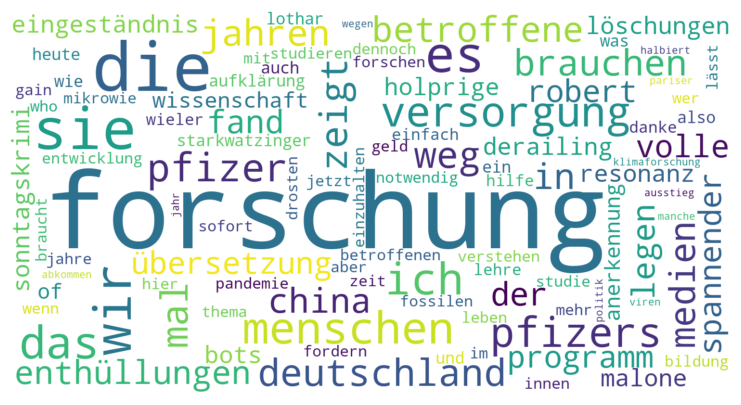

In [56]:
create_wordcloud(common_words_retweets2)

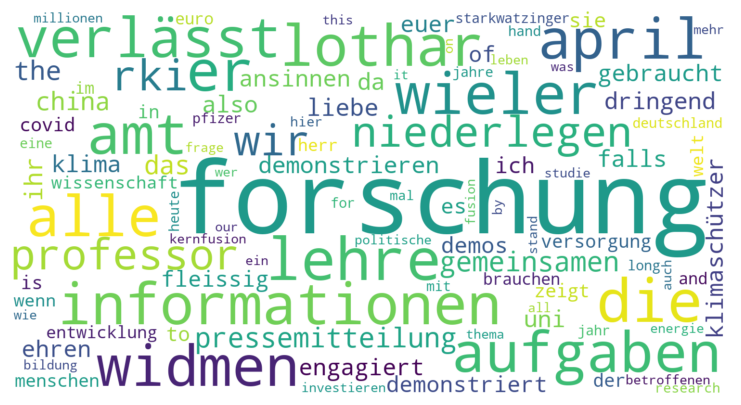

In [57]:
create_wordcloud(common_words_zitat_tweets2)

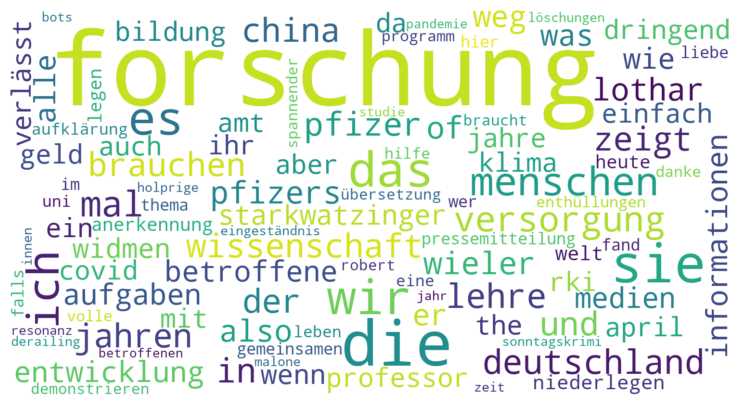

In [58]:
create_wordcloud(common_words_all2)

#### Häufigste Adjektive

In [59]:
def common_adjectives(df, name):
    adj_freq = Counter()
    for doc in df[f"spacy_doc_{name}"]:
        # Filtern nach Adjektiven und Zählen
        adjectives = [token.text.lower() for token in doc if token.text.isalpha() and token.pos_ == 'ADJ']
        adj_freq.update(adjectives)

    sorted_word_freq = adj_freq.most_common(100)
    common_adjectives = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_adjectives

In [60]:
def common_adjectives_all(df):
    names = ["tweets", "retweets", "zitat_tweets"]
    adj_freq = Counter()
    for name in names:
        for doc in df[f"spacy_doc_{name}"]:
            adjectives = [token.text.lower() for token in doc if token.text.isalpha() and token.pos_ == 'ADJ']
            adj_freq.update(adjectives)

    sorted_word_freq = adj_freq.most_common(100)
    common_adjectives = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_adjectives

In [62]:
adjectives_tweets = common_adjectives(tweets_nichtwissenschaft, 'tweets')
adjectives_retweets = common_adjectives(tweets_nichtwissenschaft, 'retweets')
adjectives_zitat_tweets = common_adjectives(tweets_nichtwissenschaft, 'zitat_tweets')
adjectives_all = common_adjectives_all(tweets_nichtwissenschaft)

In [63]:
adjectives_all.head(50)

word  freq
0                neuen   993
1                 neue   684
2          gemeinsamen   573
3                volle   537
4             holprige   506
5                liebe   438
6         medizinische   317
7              letzten   314
8                 gute   306
9              pariser   268
10             bessere   267
11           deutschen   266
12              andere   251
13          bisherigen   222
14             weitere   213
15             eigenen   210
16          politische   205
17             riesige   204
18            wichtige   189
19   wissenschaftliche   187
20             anderen   183
21            nächsten   182
22            deutsche   181
23    respiratorischen   173
24         gefährliche   171
25            modernen   170
26           aktuellen   162
27          begrenzten   157
28               erste   155
29              starke   154
30         schlimmsten   141
31       medizinischen   124
32            aktuelle   121
33  wissenschaftlichen   121
34               gutes   120
35              großen   118
36             falsche   115
37              eigene   111
38               neues   107
39             stiller   107
40              ersten   103
41         vorhandenes   103
42              jungen   100
43         öffentliche    99
44               neuer    98
45            gesamten    95
46               echte    95
47               große    91
48               guter    90
49     biomedizinische    87

In [64]:
adjectives_tweets.head(50)

word  freq
0                 neue   224
1              anderen   109
2                neuen   107
3               andere   103
4              weitere    92
5    wissenschaftliche    87
6              letzten    83
7         medizinische    72
8            aktuellen    69
9             aktuelle    69
10            deutsche    64
11                gute    64
12              eigene    62
13  wissenschaftlichen    59
14               erste    50
15             eigenen    48
16                   d    46
17            nächsten    44
18           deutschen    42
19             bessere    41
20              großen    40
21               guten    38
22               ganze    38
23               große    38
24         politischen    36
25              kleine    36
26               echte    36
27  wissenschaftlicher    33
28               neues    33
29       medizinischen    32
30               neuer    32
31             einzige    31
32               freie    30
33              ersten    30
34            wichtige    30
35              ganzen    29
36            gleichen    26
37             nächste    26
38          politische    25
39             moderne    23
40         erneuerbare    23
41               guter    23
42              besten    23
43              letzte    22
44           spannende    22
45         unabhängige    22
46            digitale    21
47               grüne    21
48          zahlreiche    21
49               junge    20

In [65]:
adjectives_retweets.head(50)

word  freq
0               volle   491
1            holprige   463
2                neue   332
3               neuen   322
4             pariser   264
5             letzten   204
6                gute   200
7        medizinische   193
8          bisherigen   179
9           deutschen   176
10   respiratorischen   159
11           modernen   152
12            bessere   146
13           wichtige   144
14         begrenzten   134
15        schlimmsten   132
16        gefährliche   131
17        gemeinsamen   129
18            eigenen   121
19            riesige   118
20             andere   111
21              liebe   107
22             starke    99
23         politische    96
24            weitere    95
25        vorhandenes    94
26           gesamten    85
27  wissenschaftliche    83
28          aktuellen    83
29           deutsche    81
30      medizinischen    77
31              erste    75
32     entscheidenden    74
33               este    74
34            stiller    73
35       strategische    73
36     qualifizierten    72
37     herausragenden    72
38        kompetenten    70
39        öffentliche    69
40          künftiger    66
41            falsche    65
42             großen    63
43           nächsten    62
44           sozialen    62
45         gerichtete    62
46            anderen    61
47         klinischen    61
48    biomedizinische    60
49        mutierenden    60

In [66]:
adjectives_zitat_tweets.head(50)

word  freq
0               neuen   564
1         gemeinsamen   442
2               liebe   322
3                neue   128
4          politische    84
5             bessere    80
6             riesige    78
7            nächsten    76
8              enorme    55
9        medizinische    52
10              gutes    50
11          regionale    50
12          deutschen    48
13              volle    44
14           holprige    43
15               gute    42
16            eigenen    41
17          deutschem    40
18   funktionierender    40
19         bisherigen    38
20        zusätzliche    38
21             andere    37
22             besten    37
23             jungen    37
24             starke    37
25           deutsche    36
26        gefährliche    36
27            falsche    35
28            stiller    33
29        wichtigsten    31
30              erste    30
31      sensationelle    28
32         andauernde    28
33            letzten    27
34       assistierten    27
35            weitere    26
36        betroffenen    25
37     internationale    24
38              alten    23
39             ersten    21
40              guter    21
41           heutigen    20
42          traurigen    19
43          aktueller    19
44        öffentliche    18
45           kräftige    18
46    vertrauensvolle    18
47  wissenschaftliche    17
48              neues    17
49    evidenzbasierte    17

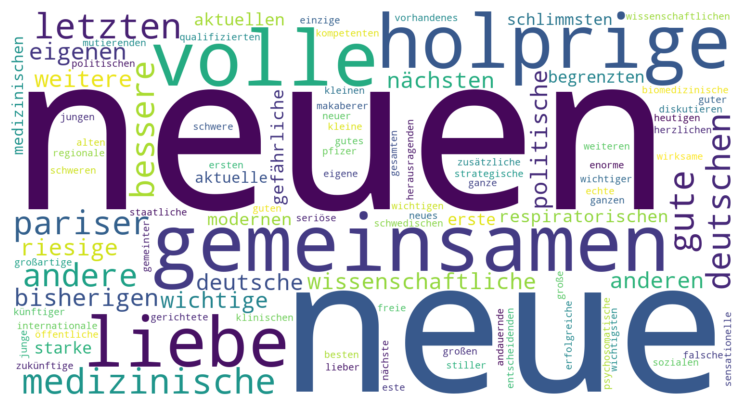

In [67]:
create_wordcloud(adjectives_all)

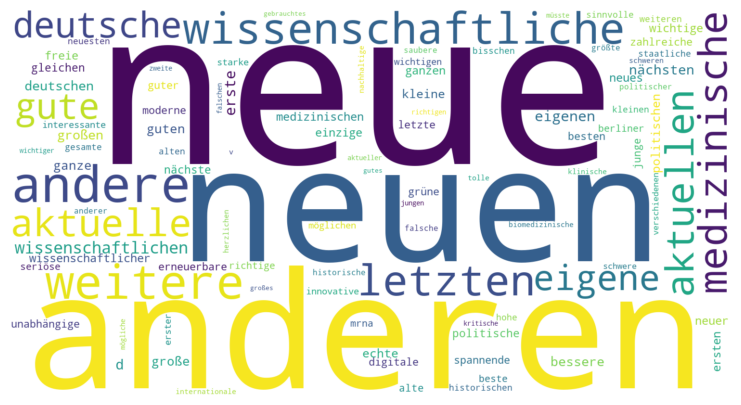

In [68]:
create_wordcloud(adjectives_tweets)

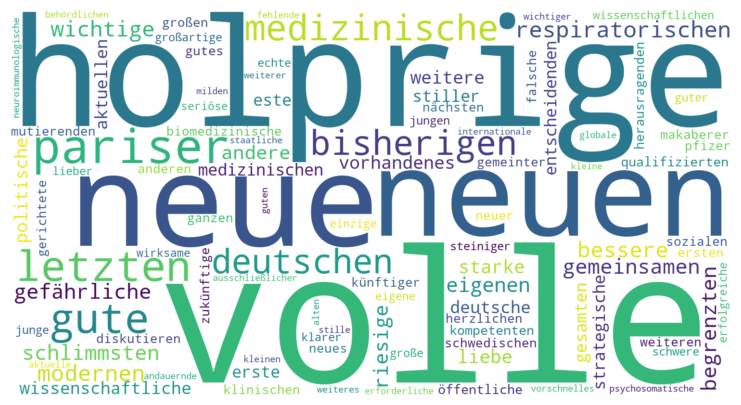

In [69]:
create_wordcloud(adjectives_retweets)

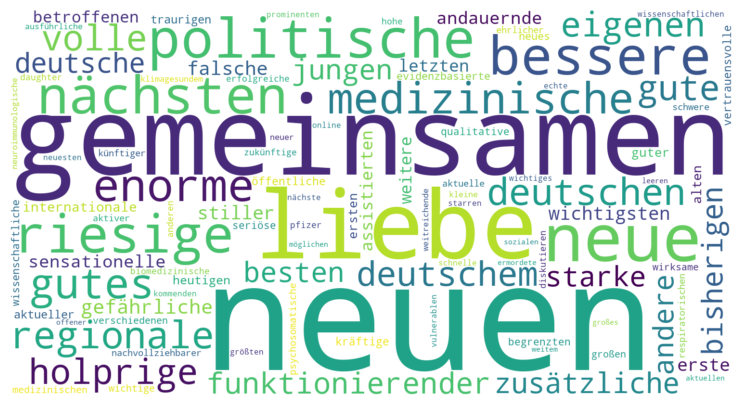

In [70]:
create_wordcloud(adjectives_zitat_tweets)

#### Häufigste Nomen 

In [71]:
from spacy.lang.de.stop_words import STOP_WORDS
from collections import Counter

In [72]:
def filter_tokens2(doc):
    return [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.pos_ == "NOUN"]

In [73]:
def common_nouns(df, name):
    nouns = []
    for doc in df[f"spacy_doc_{name}"]:
        nouns.extend(filter_tokens2(doc))

    noun_freq = Counter(nouns)
    sorted_noun_freq = noun_freq.most_common(50)
    
    common_nouns = pd.DataFrame(sorted_noun_freq, columns=["word", "freq"])

    return common_nouns

In [74]:
common_nouns_tweets = common_nouns(tweets_nichtwissenschaft, 'tweets')
common_nouns_retweets = common_nouns(tweets_nichtwissenschaft, 'retweets')
common_nouns_zitat_tweets = common_nouns(tweets_nichtwissenschaft, 'zitat_tweets')

In [75]:
common_nouns_tweets

word  freq
0          forschung  6335
1       wissenschaft   509
2             mensch   380
3               geld   370
4            bildung   345
5        entwicklung   307
6              thema   240
7             studie   230
8              lehre   210
9            problem   182
10          ergebnis   175
11             frage   166
12              frau   153
13           bereich   150
14       betroffener   147
15            wissen   147
16           politik   139
17        innovation   136
18           million   136
19        versorgung   135
20       technologie   134
21             stand   133
22   wissenschaftler   130
23              land   126
24        geschichte   126
25        medikament   126
26              kind   125
27             leute   119
28   @starkwatzinger   118
29              welt   118
30              herr   117
31           energie   115
32            pfizer   115
33           zukunft   114
34             danke   111
35             leben   107
36        kernfusion   106
37           projekt   103
38           impfung   101
39         jahrzehnt   100
40  mecfsimbundestag   100
41          forscher    99
42           medizin    98
43          therapie    96
44              fall    94
45             hilfe    94
46              arzt    94
47          pandemie    92
48            kultur    92
49        wirtschaft    92

In [76]:
common_nouns_retweets

word  freq
0          forschung  9136
1             pfizer  1120
2             mensch  1022
3         versorgung   987
4        betroffener   968
5   mecfsimbundestag   941
6      gof-forschung   845
7             medium   619
8                dr.   614
9       wissenschaft   580
10        enthüllung   541
11       anerkennung   520
12            studie   511
13          programm   481
14       übersetzung   471
15         bundestag   464
16          löschung   464
17     eingeständnis   464
18          resonanz   464
19               bot   463
20             hilfe   410
21        aufklärung   409
22             lehre   397
23                 🇪   390
24         professor   389
25           bildung   382
26         jahrzehnt   374
27       entwicklung   371
28              geld   368
29          pandemie   351
30             thema   331
31       dankewieler   324
32   @starkwatzinger   309
33        behandlung   295
34             danke   294
35             prof.   293
36           politik   281
37              arzt   280
38        sars-cov-2   273
39    klimaforschung   271
40           aufgabe   267
41          ausstieg   265
42         ee-ausbau   265
43          therapie   264
44          abkommen   264
45           fossile   264
46             drost   263
47            umgang   261
48         impfstoff   260
49        erkrankung   255

In [77]:
common_nouns_zitat_tweets

word  freq
0          forschung  2771
1              lehre   519
2        information   503
3            aufgabe   490
4                amt   474
5              april   460
6        dankewieler   452
7          professor   449
8                  ➡   445
9   pressemitteilung   444
10             klima   343
11               uni   329
12     klimaschützer   317
13          ansinnen   317
14              ehre   317
15      wissenschaft   202
16        versorgung   202
17            mensch   187
18            studie   178
19       entwicklung   171
20  mecfsimbundestag   171
21            pfizer   170
22              herr   162
23              euro   150
24           bildung   150
25       betroffener   144
26              welt   144
27        kernfusion   142
28              hand   137
29            chance   133
30   @starkwatzinger   116
31         impfstoff   115
32        innovation   113
33           energie   112
34             stand   101
35       klimawandel    99
36           million    97
37             thema    95
38             prof.    94
39         bundestag    90
40        behandlung    88
41            fusion    84
42        aufklärung    83
43              auge    83
44         jahrzehnt    82
45              land    81
46       anerkennung    79
47        ausbildung    78
48        zentralrat    78
49             biden    78

##### Wordclouds

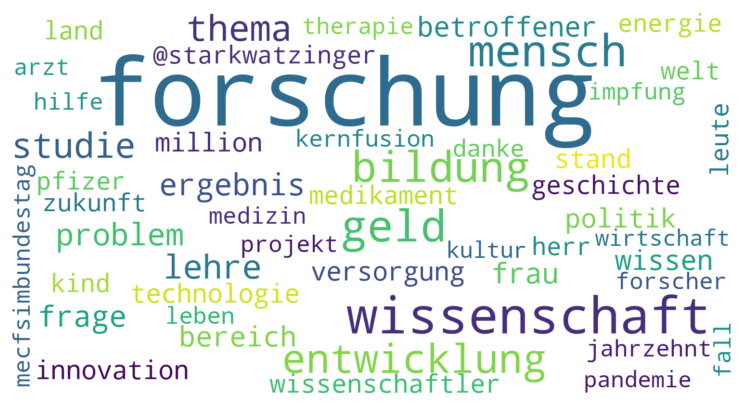

In [78]:
create_wordcloud(common_nouns_tweets)

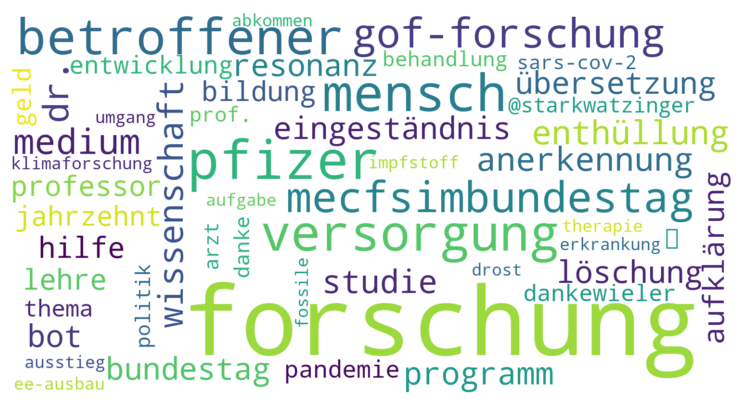

In [79]:
create_wordcloud(common_nouns_retweets)

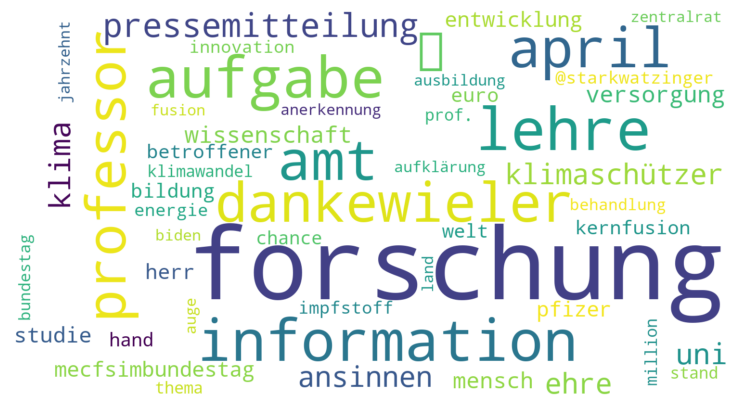

In [80]:
create_wordcloud(common_nouns_zitat_tweets)

### Häufigste Wörter in den Bios

In [81]:
def common_words_lemmas(lemmas_df):
    word_freq = Counter(lemmas_df)
    sorted_word_freq = word_freq.most_common(100)
    common_words = pd.DataFrame(sorted_word_freq, columns=["word", "freq"])
    return common_words

In [82]:
def get_lemmas_bios(df):
    lemmas = []
    for index, row in tqdm(df.iterrows(), total=df.shape[0]):
        for token in row[f"spacy_doc_bios"]:
            if not token.is_punct and \
            not token.is_space and \
            not token.is_bracket and \
            not token.is_digit and \
            not token.is_quote and \
            not token.like_url and \
            not token.like_email:
                lemmas.append(token.lemma_)
    return lemmas

In [83]:
lemmas_bios = get_lemmas_bios(accounts_nichtwissenschaft)
common_words_bios = common_words_lemmas(lemmas_bios)

  0%|          | 0/9119 [00:00<?, ?it/s]

In [84]:
common_words_bios.head(50)

word  freq
0       der  3038
1       und  2640
2         |  1498
3        in  1242
4        --  1207
5      sein  1108
6       für   747
7       ich   600
8        zu   587
9       ein   567
10      mit   508
11        ️   492
12    nicht   490
13      and   485
14      von   432
15     hier   385
16       to   331
17        🇪   330
18       of   324
19      auf   312
20        I   302
21       an   287
22       es   281
23      The   275
24      for   267
25        🇺   263
26   werden   259
27        💉   253
28     mein   250
29      aus   234
30     kein   232
31      wir   220
32    haben   206
33        a   203
34        🇩   203
35      sie   198
36      bei   191
37   Mensch   185
38     auch   179
39      nur   177
40    gegen   171
41     alle   168
42      wer   164
43   privat   161
44  Politik   161
45     sich   159
46       my   159
47        +   156
48        ‍   154
49      als   152

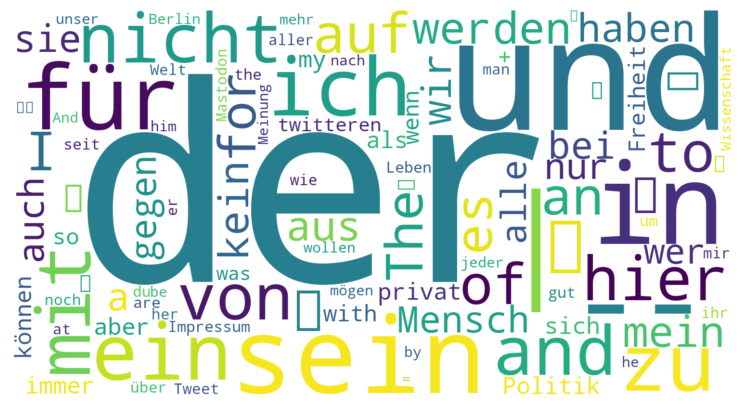

In [85]:
create_wordcloud(common_words_bios)

In [86]:
common_nouns_bios = common_nouns(accounts_nichtwissenschaft, 'bios')
common_nouns_bios

word  freq
0              🇪   312
1              💉   243
2         mensch   185
3        politik   160
4       freiheit   140
5          leben   129
6      impressum   127
7           welt   109
8        meinung    86
9          tweet    84
10  wissenschaft    80
11  gesellschaft    74
12    demokratie    70
13          kind    69
14      mitglied    67
15         thema    60
16       account    57
17         musik    57
18       bildung    57
19    journalist    54
20          team    52
21    wirtschaft    50
22          they    47
23         vater    47
24        mutter    46
25    zustimmung    46
26         natur    46
27          nazi    46
28       frieden    44
29      wahrheit    43
30          mann    43
31    geschichte    41
32           not    40
33         sport    40
34        kultur    39
35            he    39
36    gesundheit    39
37       twitter    38
38   klimaschutz    38
39          frau    36
40          land    36
41   datenschutz    36
42   information    36
43        umwelt    35
44        medium    34
45             🇮    34
46     nachricht    34
47       energie    34
48          herz    33
49     forschung    32

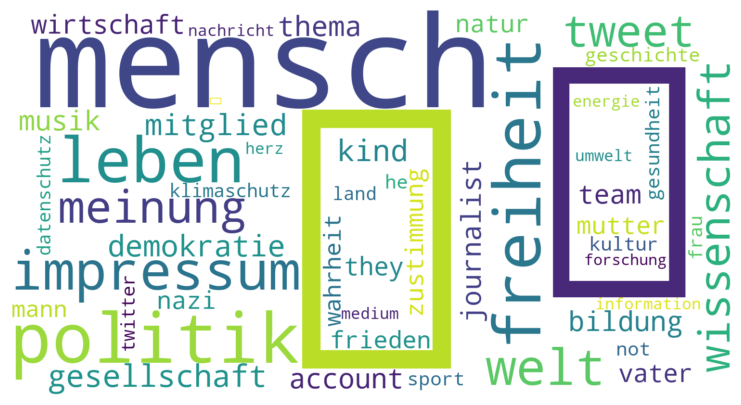

In [87]:
create_wordcloud(common_nouns_bios)

#### Die häufigsten Bigramme 

In [88]:
def get_bigrams(df, name):
    bigram_counts = Counter()
    for doc in df[f"spacy_doc_{name}"]:
        for i, token in enumerate(doc[:-1]):
            if not token.is_stop and not token.is_punct and not token.is_space \
                and not token.is_bracket and not token.is_digit \
                and not token.is_quote and not token.like_url \
                and not token.like_email and \
                    not doc[i+1].is_stop and not doc[i+1].is_punct \
                and not doc[i+1].is_space and not doc[i+1].is_bracket \
                and not doc[i+1].is_digit and not doc[i+1].is_quote \
                and not doc[i+1].like_url and not doc[i+1].like_email:
                    bigram = token.text + " " + doc[i+1].text
                    bigram_counts[bigram] += 1
                    
    most_common_bigrams = pd.DataFrame(bigram_counts.most_common(20), columns=["bigram", "freq"])

    return most_common_bigrams

In [89]:
get_bigrams(tweets_nichtwissenschaft, 'tweets')

bigram  freq
0                           🇩 🇪    58
1                           ♂ ️    52
2                    Long Covid    41
3                           ♀ ️    41
4   wissenschaftliche Forschung    40
5                           ➡ ️    40
6                       Gain of    40
7                           + +    39
8                Millionen Euro    38
9                           ⬇ ️    34
10              Herr Steinmeier    33
11       medizinische Forschung    32
12   @BMBF_Bund @starkwatzinger    30
13                          ‍ ♀    29
14                          ‍ ♂    28
15        Forschung investieren    28
16                          🤗 🤗    27
17               Wissenschaft u    27
18                  u Forschung    27
19                          😂 😂    26

In [90]:
get_bigrams(tweets_nichtwissenschaft, 'retweets')

bigram  freq
0          mRNA-Pionier Dr.   463
1                Dr. Robert   463
2             Robert Malone   463
3              Malone zeigt   463
4     Pfizers Eingeständnis   463
5             Resonanz fand   463
6            volle Programm   463
7      Holprige Übersetzung   463
8                       🇩 🇪   384
9                   Gain of   311
10       Menschen verstehen   264
11        verstehen einfach   264
12  CO2-Emissionen halbiert   264
13         Pariser Abkommen   264
14     Abkommen einzuhalten   264
15         EE-Ausbau sofort   264
16                      🇬 🇧   248
17                  UNO bat   243
18  Laborthese unterdrücken   243
19    Pfizers GoF-Forschung   243

In [91]:
get_bigrams(tweets_nichtwissenschaft, 'zitat_tweets')

bigram  freq
0                            ➡ ️   510
1                      Lothar H.   474
2                      H. Wieler   474
3                       1. April   456
4                Wieler verlässt   454
5                Amt niederlegen   453
6               Professor Lothar   442
7   gemeinsamen Pressemitteilung   442
8                    @BMG_Bund ➡   442
9            Liebe Klimaschützer   317
10                 Euer Ansinnen   317
11            dringend gebraucht   317
12            BM @starkwatzinger    80
13               Herr Steinmeier    78
14                    Herr Biden    78
15     Joseph-Göbbels Institutes    78
16          politische Forschung    78
17              Hand schüttelten    78
18           Entwicklung stecken    76
19              Dekade umgedreht    76

#### Die häufigsten Trigramme

In [92]:
def get_trigrams(df, name):
    trigram_counts = Counter()
    for doc in df[f"spacy_doc_{name}"]:
        for i, token in enumerate(doc[:-2]):
            if not token.is_stop and not token.is_punct and not token.is_space \
                and not token.is_bracket and not token.is_digit \
                and not token.is_quote and not token.like_url \
                and not token.like_email and \
                not doc[i+1].is_stop and not doc[i+1].is_punct \
                and not doc[i+1].is_space and not doc[i+1].is_bracket \
                and not doc[i+1].is_digit and not doc[i+1].is_quote \
                and not doc[i+1].like_url and not doc[i+1].like_email and \
                not doc[i+2].is_stop and not doc[i+2].is_punct \
                and not doc[i+2].is_space and not doc[i+2].is_bracket \
                and not doc[i+2].is_digit and not doc[i+2].is_quote \
                and not doc[i+2].like_url and not doc[i+2].like_email:
                    trigram = token.text + " " + doc[i+1].text + " " + doc[i+2].text
                    trigram_counts[trigram] += 1
    
    most_common_trigrams = pd.DataFrame(trigram_counts.most_common(10), columns=["trigram", "freq"])

    return most_common_trigrams

In [93]:
get_trigrams(tweets_nichtwissenschaft, 'tweets')

trigram  freq
0                        ‍ ♀ ️    25
1                        ‍ ♂ ️    25
2                        🤗 🤗 🤗    24
3     Wissenschaft u Forschung    24
4             Gain of Function    23
5                        + + +    22
6  @rki_de @BMG_Bund @mikrowie    22
7     Herr Steinmeier anwesend    18
8                       🏻‍ ♂ ️    17
9        of Function Forschung    17

In [94]:
get_trigrams(tweets_nichtwissenschaft, 'retweets')

trigram  freq
0       mRNA-Pionier Dr. Robert   463
1             Dr. Robert Malone   463
2           Robert Malone zeigt   463
3    Menschen verstehen einfach   264
4  Pariser Abkommen einzuhalten   264
5                         🇬 🇧 🇩   243
6                         🇧 🇩 🇪   243
7              Lothar H. Wieler   214
8  Pfizer bestätigte inzwischen   207
9      Forschung mutieren lässt   207

In [95]:
get_trigrams(tweets_nichtwissenschaft, 'zitat_tweets')

trigram  freq
0               Lothar H. Wieler   474
1            Professor Lothar H.   442
2             H. Wieler verlässt   442
3                  @BMG_Bund ➡ ️   442
4             Mio. Euro jährlich    69
5    brauchen bessere Impfstoffe    50
6  Marburg zeigt @BioNTech_Group    48
7        mRNA-Pionier Dr. Robert    43
8              Dr. Robert Malone    43
9            Robert Malone zeigt    43

## Analyse der Hashtags

In [96]:
import re
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [97]:
def count_hashtags_all(df):
    hashtags = []
    
    for index, row in df.iterrows():
        for column in ['tweet_text', 'retweet_text_retweeted_tweet', 'zitat_text']:
            hashtags.extend(re.findall(r'#\w+', str(row[column])))
    
    hashtags_counter = Counter(hashtags)
    
    top_n_hashtags = hashtags_counter.most_common(30)
    for hashtag, count in top_n_hashtags:
        print(f"{hashtag}: {count}")
    
    # Word Cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtags_counter)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#MECFS: 2004
#LongCovid: 1627
#MECFSimBundestag: 1060
#Forschung: 990
#DankeWieler: 778
#PostVac: 360
#NichtGenesen: 297
#Wissenschaft: 293
#Pfizer: 259
#mecfs: 249
#Corona: 244
#MEcfs: 240
#Meinungsfreiheit: 217
#Zensur: 215
#postvac: 212
#Bildung: 187
#Berlin: 182
#Impfschaeden: 176
#Kernfusion: 164
#Zukunftsstrategie: 160
#Klimawandel: 157
#Bundestag: 142
#FDP: 136
#COVID19: 134
#Luetzerath: 133
#Longcovid: 131
#3K23: 130
#forschung: 122
#Deutschlandtempo: 103
#Innovation: 100


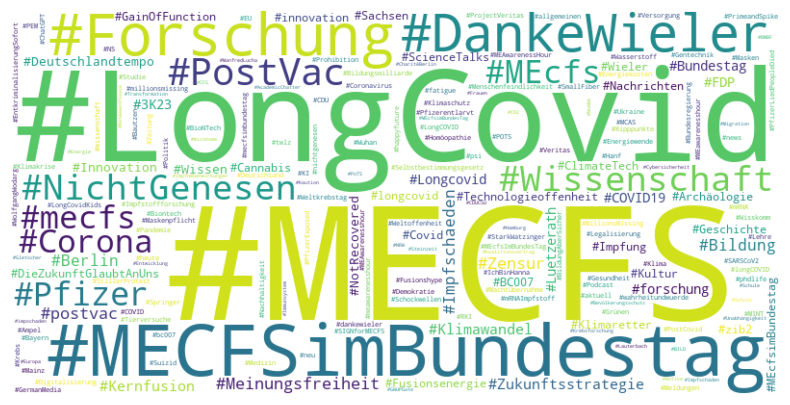

In [98]:
count_hashtags_all(tweets_nichtwissenschaft)

In [99]:
def count_hashtags_seperate(df):
    hashtags_per_column = {'tweet_text': Counter(), 'retweet_text_retweeted_tweet': Counter(), 'zitat_text': Counter()}
    
    for index, row in df.iterrows():
        for column in hashtags_per_column:
            hashtags_per_column[column].update(re.findall(r'#\w+', str(row[column])))
    
    for column, hashtags_counter in hashtags_per_column.items():
        print(f"Top hashtags in {column}:")
        top_n_hashtags = hashtags_counter.most_common(20)
        for hashtag, count in top_n_hashtags:
            print(f"{hashtag}: {count}")
        print()

In [100]:
count_hashtags_seperate(tweets_nichtwissenschaft)

Top hashtags in tweet_text:
#Forschung: 342
#MECFS: 197
#LongCovid: 177
#Wissenschaft: 118
#MECFSimBundestag: 93
#Bildung: 84
#Wissen: 80
#Nachrichten: 74
#Geschichte: 73
#Kultur: 73
#Archäologie: 72
#forschung: 65
#heute: 65
#aktuell: 64
#Meldungen: 61
#neu: 58
#mecfs: 55
#DankeWieler: 38
#postvac: 31
#Deutschland: 28

Top hashtags in retweet_text_retweeted_tweet:
#MECFS: 1494
#LongCovid: 1122
#MECFSimBundestag: 822
#Forschung: 521
#PostVac: 321
#DankeWieler: 288
#NichtGenesen: 233
#Meinungsfreiheit: 209
#Zensur: 207
#MEcfs: 195
#Pfizer: 175
#postvac: 167
#Impfschaeden: 166
#mecfs: 149
#Wissenschaft: 137
#Corona: 126
#Bundestag: 124
#Berlin: 118
#Longcovid: 111
#FDP: 101

Top hashtags in zitat_text:
#DankeWieler: 452
#LongCovid: 328
#MECFS: 313
#MECFSimBundestag: 145
#Forschung: 127
#Klimawandel: 100
#Corona: 98
#Luetzerath: 87
#innovation: 79
#Klimaretter: 76
#ClimateTech: 76
#Fusionsenergie: 69
#Zukunftsstrategie: 68
#3K23: 64
#COVID19: 62
#Pfizer: 62
#DieZukunftGlaubtAnUns: 55
#Tec